# Predicting English Premier League match results with Machine Learning Model

I have been watching the premier league since 2005, and I am obsessed with Chelsea football club (current champions league holder). Most of my weekend goes with watching the premier league, especially Chelsea. Every season, me and my friends try to predict the result for the end of the season. Although these predictions are based on some data and reasoning, they do not follow any particular logic. However, this time, using different methods and tools of data science, I try to answer the follwing questions.


1. How many points would Chelsea accumulate at the end of this season?
2. Would these points be sufficient to win the league?

## Different Steps of the Proposal.

### Loading important library

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf

/Users/sawrose/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Data Collection

The data set is downloaded from
https://www.kaggle.com/irkaal/english-premier-league-results

In [2]:
df_result = pd.read_csv("results.csv", encoding='cp949')

print('The shape of our dataset is ', df_result.shape)
df_result.Season = df_result.Season.str.extract('(\d+)').astype(int)

df_result.tail()

The shape of our dataset is  (10874, 23)


,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
10869,2021,2021-10-02T17:30:00Z,Brighton,Arsenal,0,0,D,0.0,0.0,D,...,2.0,2.0,8.0,5.0,8.0,5.0,2.0,1.0,0.0,0.0
10870,2021,2021-10-03T14:00:00Z,Crystal Palace,Leicester,2,2,D,0.0,2.0,A,...,4.0,5.0,1.0,3.0,15.0,11.0,2.0,3.0,0.0,0.0
10871,2021,2021-10-03T14:00:00Z,Tottenham,Aston Villa,2,1,H,1.0,0.0,H,...,8.0,3.0,5.0,8.0,11.0,14.0,2.0,1.0,0.0,0.0
10872,2021,2021-10-03T14:00:00Z,West Ham,Brentford,1,2,A,0.0,1.0,A,...,5.0,6.0,11.0,6.0,16.0,13.0,2.0,3.0,0.0,0.0
10873,2021,2021-10-03T16:30:00Z,Liverpool,Man City,2,2,D,0.0,0.0,D,...,4.0,3.0,3.0,4.0,10.0,12.0,3.0,3.0,0.0,0.0


### Cleaning data

Cleaning data for future use. We found that the some data in referee column was missing until 2000. So we remove that data


In [3]:
print( df_result.isnull().values.sum())

39484


In [4]:
new_data = df_result[(df_result.Season != 1993) & (df_result.Season != 1994) &
                     (df_result.Season != 1995) & (df_result.Season != 1996) &
                    (df_result.Season != 1997) & (df_result.Season != 1998) &
                     (df_result.Season != 1999)&  (df_result.Season != 2021) 
                    ].reset_index().drop('index', axis=1)


In [5]:
print(new_data.isnull().values.sum())


0


In [6]:
 new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7980 entries, 0 to 7979
Data columns (total 23 columns):
Season      7980 non-null int64
DateTime    7980 non-null object
HomeTeam    7980 non-null object
AwayTeam    7980 non-null object
FTHG        7980 non-null int64
FTAG        7980 non-null int64
FTR         7980 non-null object
HTHG        7980 non-null float64
HTAG        7980 non-null float64
HTR         7980 non-null object
Referee     7980 non-null object
HS          7980 non-null float64
AS          7980 non-null float64
HST         7980 non-null float64
AST         7980 non-null float64
HC          7980 non-null float64
AC          7980 non-null float64
HF          7980 non-null float64
AF          7980 non-null float64
HY          7980 non-null float64
AY          7980 non-null float64
HR          7980 non-null float64
AR          7980 non-null float64
dtypes: float64(14), int64(3), object(6)
memory usage: 1.4+ MB


### Exploratory Data Analysis (Input)
1. Although, I know have played in each premier league season but to make sure, we plot the home team that has played the maximum match. We find that Chelsea together with Manchester United, Arsenal, Liverpool, Tootenham and Everton has played all the premier league matches.

2. Next thing is that referee influnece the game but some referee may have died or retired so i decided not to drop the referee column from further analysis

3. Only the match day effect the results not actula date. So we convert the actual date to the days of the week


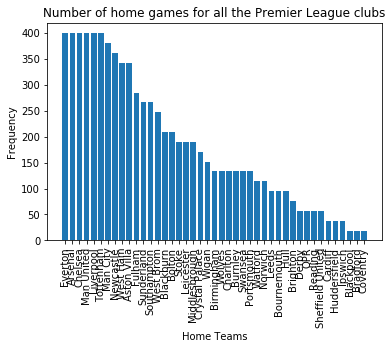

In [7]:
# create a figure and axis 
fig, ax = plt.subplots() 

# count the occurrence of each class 
data =new_data['HomeTeam'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 
plt.setp(ax.get_xticklabels(), rotation=90)
# set title and labels 
ax.set_title('Number of home games for all the Premier League clubs');
ax.set_xlabel('Home Teams');
ax.set_ylabel('Frequency');

In [8]:
pl_data = new_data.copy()
pl_data.drop(['Referee'], axis=1, inplace=True)
pl_data.drop(['Season'], axis=1, inplace=True)
pl_data.head()

,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,HS,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
0,2000-08-19T00:00:00Z,Charlton,Man City,4,0,H,2.0,0.0,H,17.0,...,14.0,4.0,6.0,6.0,13.0,12.0,1.0,2.0,0.0,0.0
1,2000-08-19T00:00:00Z,Chelsea,West Ham,4,2,H,1.0,0.0,H,17.0,...,10.0,5.0,7.0,7.0,19.0,14.0,1.0,2.0,0.0,0.0
2,2000-08-19T00:00:00Z,Coventry,Middlesbrough,1,3,A,1.0,1.0,D,6.0,...,3.0,9.0,8.0,4.0,15.0,21.0,5.0,3.0,1.0,0.0
3,2000-08-19T00:00:00Z,Derby,Southampton,2,2,D,1.0,2.0,A,6.0,...,4.0,6.0,5.0,8.0,11.0,13.0,1.0,1.0,0.0,0.0
4,2000-08-19T00:00:00Z,Leeds,Everton,2,0,H,2.0,0.0,H,17.0,...,8.0,6.0,6.0,4.0,21.0,20.0,1.0,3.0,0.0,0.0


In [9]:
#converting match date day of the week

pl_data["matchDate"] = pd.to_datetime(pl_data["DateTime"], infer_datetime_format=True)
pl_data['MatchDay'] = pl_data['matchDate'].dt.day_name()



pl_data.drop('DateTime', axis=1, inplace=True)
pl_data.drop('matchDate', axis=1, inplace=True)




4. Next thing we wanted to check whether the Home team and away team feature is significant. If it is significant, we need to convert them to binary numbers. We find, as shown below, that home team has lot of wins. So by using dummies we convert object to numeric data

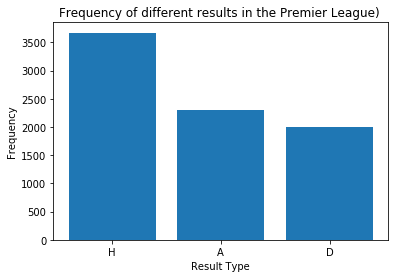

In [10]:
fig, chart = plt.subplots() 
data = pl_data['FTR'].value_counts() 

points = data.index 
frequency = data.values 

chart.bar(points, frequency)

chart.set_title('Frequency of different results in the Premier League) '); 
chart.set_xlabel('Result Type'); 
chart.set_ylabel('Frequency');

In [11]:
pl_data = pd.get_dummies(pl_data, columns=['HomeTeam'], prefix = ['HomeTeam'])
pl_data = pd.get_dummies(pl_data, columns=['AwayTeam'], prefix = ['AwayTeam'])
pl_data = pd.get_dummies(pl_data, columns=['HTR'], prefix = ['HTR'])
pl_data = pd.get_dummies(pl_data, columns=['MatchDay'], prefix = ['MatchDay'])


In [12]:
pl_data.head()

,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,...,HTR_A,HTR_D,HTR_H,MatchDay_Friday,MatchDay_Monday,MatchDay_Saturday,MatchDay_Sunday,MatchDay_Thursday,MatchDay_Tuesday,MatchDay_Wednesday
0,4,0,H,2.0,0.0,17.0,8.0,14.0,4.0,6.0,...,0,0,1,0,0,1,0,0,0,0
1,4,2,H,1.0,0.0,17.0,12.0,10.0,5.0,7.0,...,0,0,1,0,0,1,0,0,0,0
2,1,3,A,1.0,1.0,6.0,16.0,3.0,9.0,8.0,...,0,1,0,0,0,1,0,0,0,0
3,2,2,D,1.0,2.0,6.0,13.0,4.0,6.0,5.0,...,1,0,0,0,0,1,0,0,0,0
4,2,0,H,2.0,0.0,17.0,12.0,8.0,6.0,6.0,...,0,0,1,0,0,1,0,0,0,0


### Exploratory Data Analysis (Output label)
Now we see the full time results is H A or D meaning HomeTeam win, AwayTeam win or Draw so we convert them using label encoder

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
pl_data['FTR']= label_encoder.fit_transform(pl_data['FTR'])
print('Unique values for our label are: ', pl_data['FTR'].unique())
print('if the home team wins the label is ', pl_data['FTR'][0])
print('if the away team wins the label is ', pl_data['FTR'][2])
print('if there is a tie the label is ', pl_data['FTR'][3])



Unique values for our label are:  [2 0 1]
if the home team wins the label is  2
if the away team wins the label is  0
if there is a tie the label is  1


### Setting label and features

In [14]:
label = pl_data['FTR']

features = pl_data.iloc[:,3:113]

### Train (2/3) and Test Data (1/3)

In [15]:
from sklearn.model_selection import train_test_split

y=np.ravel(label)
X = features


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)
print("The shape of X_train is " + str(X_train.shape))
print("The size of y_train is " + str(y_train.shape))
print("The size of X_test set is " + str(X_test.shape))
print("The size of y_test is " + str(y_test.shape))

The shape of X_train is (5346, 110)
The size of y_train is (5346,)
The size of X_test set is (2634, 110)
The size of y_test is (2634,)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve

Accuracy: 0.646


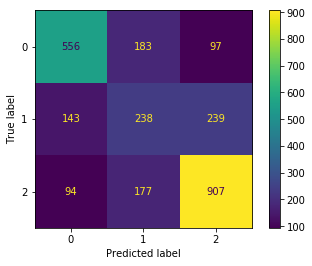

In [17]:
model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)
# make predictions
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)
plot_confusion_matrix(model, X_test, y_test)  
plt.show()

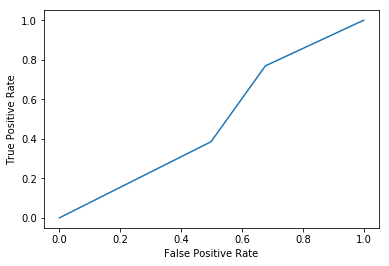

In [18]:
fpr, tpr, _ = roc_curve(y_test, yhat, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

# Neural network using tensorflow and keras

In [19]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=3)

In [20]:
model = tf.keras.models.Sequential([
tf.keras.layers.Dense(330, input_dim=110, activation='relu'),
tf.keras.layers.Dense(10, input_dim=330, activation='relu'),
tf.keras.layers.Dense(3,activation='softmax')
])
model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 330)               36630     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3310      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 39,973
Trainable params: 39,973
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, epochs=100);

Epoch 1/100
5346/5346 [==============================] - 1s 217us/step - loss: 0.8997 - acc: 0.5847
Epoch 2/100
5346/5346 [==============================] - 1s 122us/step - loss: 0.7795 - acc: 0.6382
Epoch 3/100
5346/5346 [==============================] - 1s 132us/step - loss: 0.7723 - acc: 0.6425
Epoch 4/100
5346/5346 [==============================] - 1s 127us/step - loss: 0.7701 - acc: 0.6444
Epoch 5/100
5346/5346 [==============================] - 1s 164us/step - loss: 0.7584 - acc: 0.6515
Epoch 6/100
5346/5346 [==============================] - 1s 106us/step - loss: 0.7541 - acc: 0.6483
Epoch 7/100
5346/5346 [==============================] - 1s 150us/step - loss: 0.7641 - acc: 0.6440
Epoch 8/100
5346/5346 [==============================] - 0s 84us/step - loss: 0.7618 - acc: 0.6442
Epoch 9/100
5346/5346 [==============================] - 0s 63us/step - loss: 0.7469 - acc: 0.6506
Epoch 10/100
5346/5346 [==============================] - 0s 67us/step - loss: 0.7367 - acc: 0.6508
Ep

5346/5346 [==============================] - 1s 97us/step - loss: 0.0816 - acc: 0.9817
Epoch 83/100
5346/5346 [==============================] - 0s 93us/step - loss: 0.0961 - acc: 0.9716
Epoch 84/100
5346/5346 [==============================] - 0s 70us/step - loss: 0.0719 - acc: 0.9845
Epoch 85/100
5346/5346 [==============================] - 0s 61us/step - loss: 0.0655 - acc: 0.9869
Epoch 86/100
5346/5346 [==============================] - 0s 74us/step - loss: 0.0580 - acc: 0.9886
Epoch 87/100
5346/5346 [==============================] - 0s 65us/step - loss: 0.0960 - acc: 0.9704
Epoch 88/100
5346/5346 [==============================] - 0s 64us/step - loss: 0.1052 - acc: 0.9611
Epoch 89/100
5346/5346 [==============================] - 0s 81us/step - loss: 0.1127 - acc: 0.9615
Epoch 90/100
5346/5346 [==============================] - 0s 66us/step - loss: 0.0522 - acc: 0.9906
Epoch 91/100
5346/5346 [==============================] - 0s 61us/step - loss: 0.0450 - acc: 0.9910
Epoch 92/100


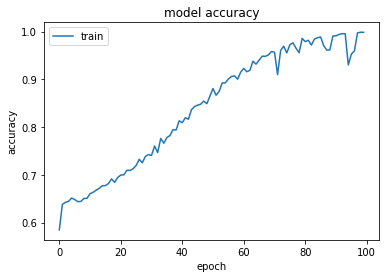

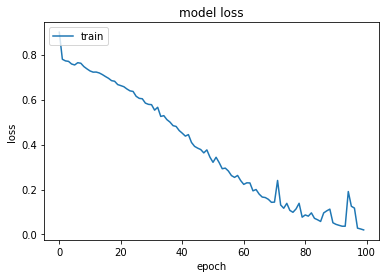

In [22]:
#accuracy history
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()
#loss history
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

2634/2634 [==============================] - 0s 59us/step
Test Score: 3.404322982105959
Test Accuracy: 0.582004555853914


Test Accuracy is not good. One of the possible reason is overfitting of the trianing set.

# Future work:

1. Try to improve the accuracy of the model
2. Calculate the total points for this season 
3. Hosting this model in the Heruko App